In [1]:
from analysis import Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
PATH100_BATCH2 = "F:\Thesis\Experiments\Costs\Results\/25-06-2022 Batch-2 100.csv"
PATH100_BATCH3 = "F:\Thesis\Experiments\Costs\Results\/27-06-2022 Batch-3 100.csv"
PATH100_BATCH4 = "F:\Thesis\Experiments\Costs\Results\/28-06-2022 Batch-4 100.csv"
PATHME_BATCH2 = "F:\Thesis\Experiments\Costs\Results\/24-06-2022 Batch-2 ME.csv"
PATHME_BATCH3 = "F:\Thesis\Experiments\Costs\Results\/27-06-2022 Batch-3 ME.csv"
PATHME_BATCH4 = "F:\Thesis\Experiments\Costs\Results\/28-06-2022 Batch-4 ME.csv"
data100_batch2 = pd.read_csv(PATH100_BATCH2)
data100_batch3 = pd.read_csv(PATH100_BATCH3)
data100_batch4 = pd.read_csv(PATH100_BATCH4)
datame_batch2 = pd.read_csv(PATHME_BATCH2)
datame_batch3 = pd.read_csv(PATHME_BATCH3)
datame_batch4 = pd.read_csv(PATHME_BATCH4)
data100 = pd.concat([data100_batch2, data100_batch3, data100_batch4], ignore_index=True)
datame = pd.concat([datame_batch2, datame_batch3, datame_batch4], ignore_index=True)

data100 = Analysis.append_durations(data100)
datame = Analysis.append_durations(datame)
print("fast subjects ME: ", datame['duration'].isnull().values.any())
print("fast subjects 100: ", data100['duration'].isnull().values.any())

s100_data = Analysis.convert_100_data(data100)
mes_data = Analysis.convert_me_data(datame)

print("subjects that failed the attention checks in the ME survey: ", mes_data['attention_checks_passed'].loc[mes_data['attention_checks_passed'] == False].values.any())
print("subjects that failed the attention checks in the 100-level survey: ", s100_data['attention_checks_passed'].loc[s100_data['attention_checks_passed'] == False].values.any())


fast subjects ME:  False
fast subjects 100:  False
subjects that failed the attention checks in the ME survey:  False
subjects that failed the attention checks in the 100-level survey:  False


In [2]:
print(s100_data)
print(mes_data)

                prolificid.     TP1    TP2    TP3    TP4    TP5    TP6    TP7  \
0   5ea6d7f8f599000683a57743   80.0   89.0   87.0    0.0   77.0   90.0   60.0   
1   5fff3183426b8c6c2474c831  100.0  100.0  100.0  -15.0  100.0  100.0   25.0   
2   5eec061660ae2d3fdbd62f1e   90.0  100.0  100.0   70.0  100.0   96.0   90.0   
3   601b0b595aa8af3f53a44fcc  100.0  100.0   95.0 -100.0  100.0   98.0   98.0   
4   5f8632cff7f4b1181047057d  -90.0  100.0  100.0  100.0  100.0    0.0  -30.0   
..                       ...    ...    ...    ...    ...    ...    ...    ...   
63  610769e6cd631d5f2999a5c9 -100.0 -100.0  -99.0  -91.0 -100.0 -100.0  -14.0   
64  60d1cd727ab62d8f978d8cf7  100.0   99.0  100.0   98.0   98.0   99.0  100.0   
65  6144e07daad38d78db932d30  100.0  100.0   98.0   95.0  100.0  100.0  100.0   
66  56a930c711926500056e6eed   94.0   20.0   98.0   99.0   99.0   99.0   99.0   
67  61267b828ead584bcf092e35   80.0  100.0  100.0  100.0  100.0   99.0  100.0   

      TP8    TN1  ...  Hate

In [3]:
print("ME scale")
Analysis.print_means(mes_data)
print("100-level scale")
Analysis.print_means(s100_data)


ME scale
TP 18.149543604085686
TN 36.31953463203463
FP -16.68669949423102
FN -28.08375563063063
REJ -4.82167904290429
100-level scale
TP 77.0
TN 86.3125
FP -51.0
FN -62.4375
REJ -16.375


In [4]:
Analysis.print_reliabilities(mes_data, scale="ME")

Reliability scale:  0.7799353310345875
TP 0.06642454307046264
TN 0.09947271297584492
FP 0.39314678266051883
FN 0.9194940763976943
REJ -0.31122839546794645


In [5]:
Analysis.print_reliabilities(s100_data, scale="S100")


Reliability scale:  0.4395143291058283
TP 0.04369406920309393
TN 0.10804626893353575
FP 0.07016599993170014
FN 0.13760526467192835
REJ 0.07305482583194356


In [6]:
Analysis.print_scale_statistics(data_mes=mes_data, data_s100=s100_data)

Cohen's d -0.10781110422885257
Shapiro Wilk normality test MES:  ShapiroResult(statistic=0.9386324882507324, pvalue=0.03110472299158573)
Shapiro Wilk normality test S100:  ShapiroResult(statistic=0.9038270115852356, pvalue=0.0024751070886850357)
Bartlett's test for equal variances:   BartlettResult(statistic=23.169938607534405, pvalue=1.4829754276240305e-06)
Mann-Whitney U test:  MannwhitneyuResult(statistic=781.0, pvalue=0.8584060323634835)
Unpaired T-test:  Ttest_indResult(statistic=-0.4760809456419864, pvalue=0.6353475264961408)
Pearson:  (0.8810561483890929, 6.400903945489071e-14)
Spearman:  SpearmanrResult(correlation=0.9764884501907493, pvalue=6.242116730787412e-27)
Kendall:  KendalltauResult(correlation=0.8913915515061044, pvalue=2.1964128070678537e-15)


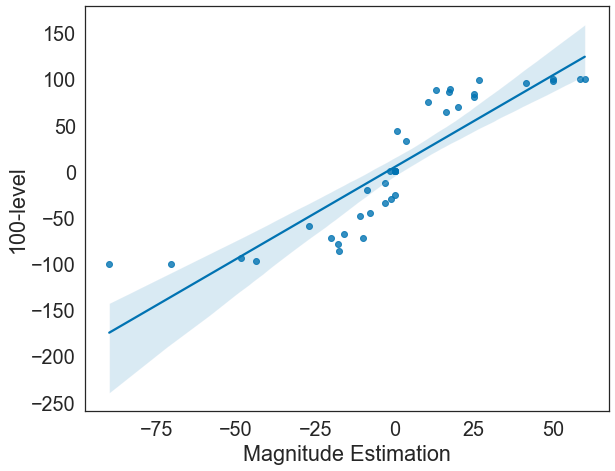

In [7]:
%matplotlib inline
sns.set(rc={'figure.figsize':(9,7)})
sns.set(font_scale = 1.8, palette="colorblind")
sns.set_style("white")
Analysis.plot_validity(data_mes=mes_data, data_s100=s100_data)

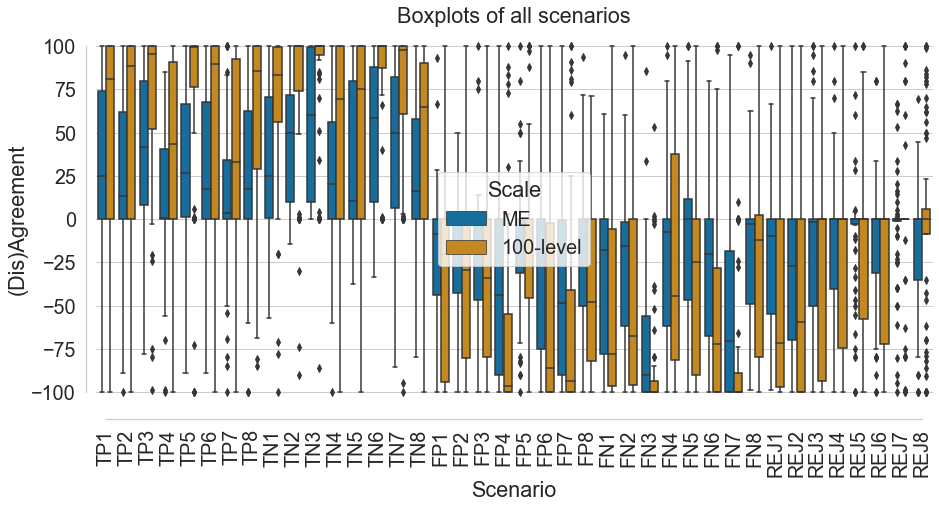

In [8]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.8, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_dual_boxplots(data_mes=mes_data, data_s100=s100_data)

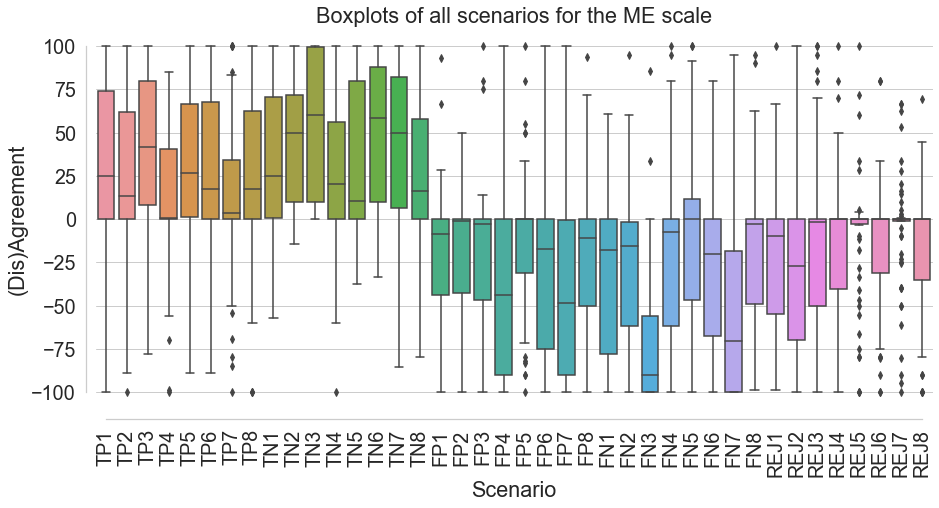

In [9]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.8, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=mes_data, scale_title="ME")

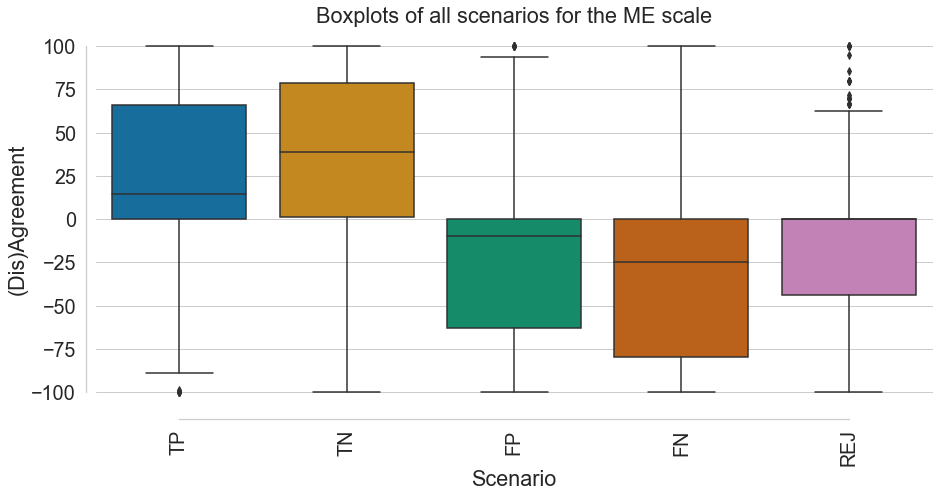

In [10]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.8, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=mes_data, scale_title="ME", show_individual=False)

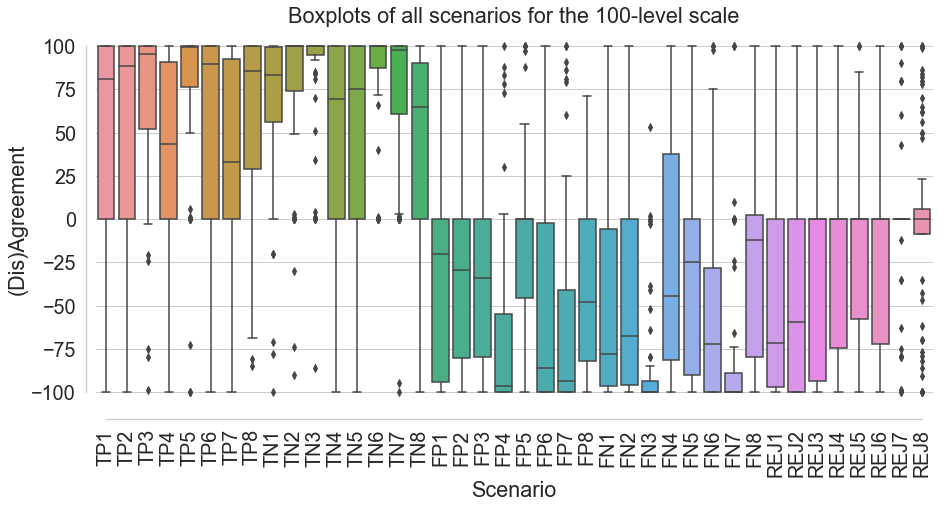

In [11]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.8, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=s100_data, scale_title="100-level")

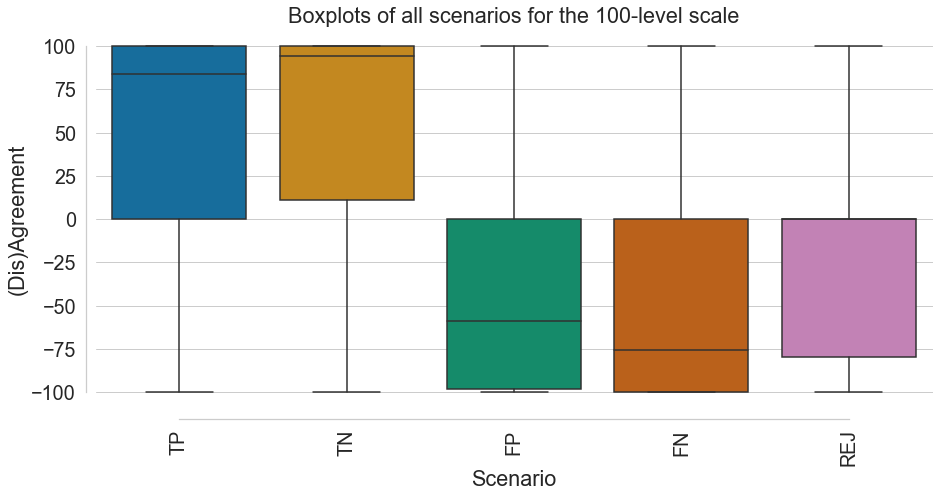

In [12]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.8, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=s100_data, scale_title="100-level", show_individual=False)

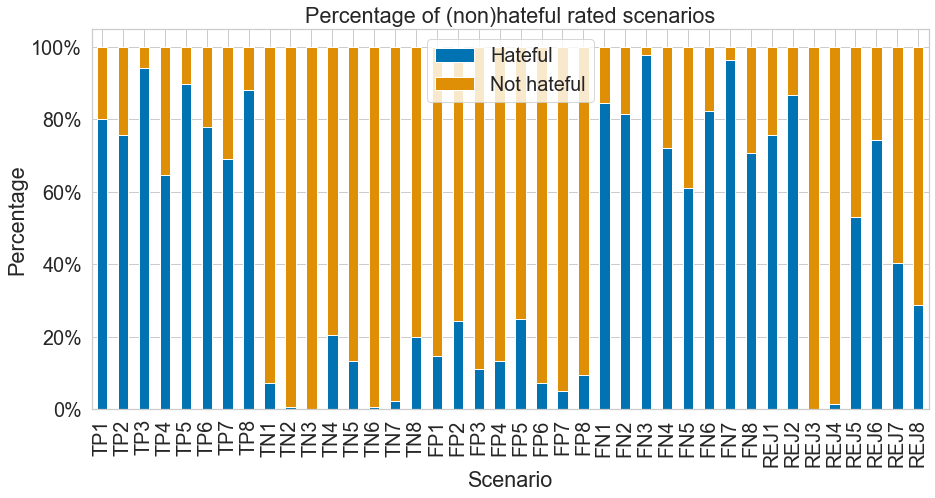

In [13]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.8, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_hatefulness(data_mes=mes_data, data_s100=s100_data)